In [16]:
import mplfinance as mpf
import pymssql
import json
import pandas as pd
import numpy as np

db_settings = {
    "host": "172.30.52.193",
    "port": 1433,
    "user": "sa",
    "password": "255089",
    "database": "ncudb",
    "charset": "utf8"
}

In [17]:
try:  
    conn = pymssql.connect(**db_settings)
    with conn.cursor() as cursor:
        command = "SELECT date, o, h, l, c, v FROM stock_price WHERE date like '2023-02-%' and stock_code = '2330';"
        cursor.execute(command)
        result = cursor.fetchall()
except Exception as ex:
    print(ex)

conn.close()

In [18]:
arr = []
for r in result:
    r = list(r)
    r[0] = r[0];
    r[1] = float(r[1])
    r[2] = float(r[2])
    r[3] = float(r[3])
    r[4] = float(r[4])
    r[5] = float(r[5])
    arr.append(r)

In [19]:
arr_df = pd.DataFrame(arr)
arr_df.index = pd.to_datetime(arr_df[0])
arr_df = arr_df.drop(columns=[0])
arr_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
arr_df.index.name = "Date"
arr_df


,Open,High,Low,Close,Volume
Date,,,,,
2023-02-01,532.0,533.0,522.0,530.0,31487.0
2023-02-02,538.0,542.0,537.0,540.0,45495.0
2023-02-03,540.0,542.0,536.0,542.0,39674.0
2023-02-06,532.0,533.0,526.0,526.0,46279.0
2023-02-07,524.0,528.0,522.0,523.0,28519.0
2023-02-08,538.0,540.0,534.0,540.0,43495.0
2023-02-09,540.0,540.0,536.0,540.0,19698.0
2023-02-10,544.0,546.0,541.0,545.0,40984.0
2023-02-13,544.0,544.0,538.0,541.0,22431.0


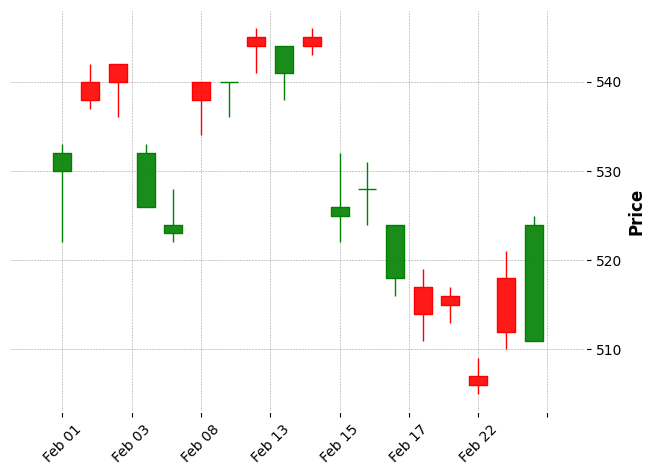

In [20]:
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc)

mpf.plot(arr_df, type='candle', style=s)